**Predicting Usage of a Video Game Research Server**

This project focuses on a dataset collected from a minecraft server that study how players interact with the game. Unfortunately, the research team in charge of this study is having difficulty attracting the right audience and maintaining enough resources, time, and money to handle the player capacity. The team set up a game-related newsletter to try to attract and identify certain players who are more likely to engage with this study. This leads us to the question, is it possible to predict the likelihood of a player signing up for game-related newsletter subscription based on characteristics and behavior?

The dataset used for this analysis was players.csv and contains a list of different characteristics of each player.
Dataset summary: The players.csv dataset contains 196 rows and the are the main variables used for this study are experience, played_hours, age, gender (characteristics) and subscribe (target variable). hashedEmail and name are excluded from this study as these variables are not likely to influence subscription behavior.

experience: Player skill level

played_hours: How often a player plays the game

Age: Can affect subscription engagement 

gender: May influence subscription behavior

subscribe: Records whether a player subscribed to a newsletter. This is the main target vairable for prediction.


In [1]:
library(tidyverse)
library(tidymodels)
library(lubridate)
library(repr)
library(RColorBrewer)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_data <- read_csv("players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [4]:
players_clean <- players_data |>
select(-hashedEmail, -name, -gender) |>
filter(!is.na(Age)) |>
mutate(subscribe = as_factor(subscribe), experience = as_factor(experience))
players_clean

experience,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
Pro,TRUE,30.3,9
Veteran,TRUE,3.8,17
Veteran,FALSE,0.0,17
Amateur,TRUE,0.7,21
Regular,TRUE,0.1,21
Amateur,TRUE,0.0,17
Regular,TRUE,0.0,19
Amateur,FALSE,0.0,21
Amateur,TRUE,0.1,17


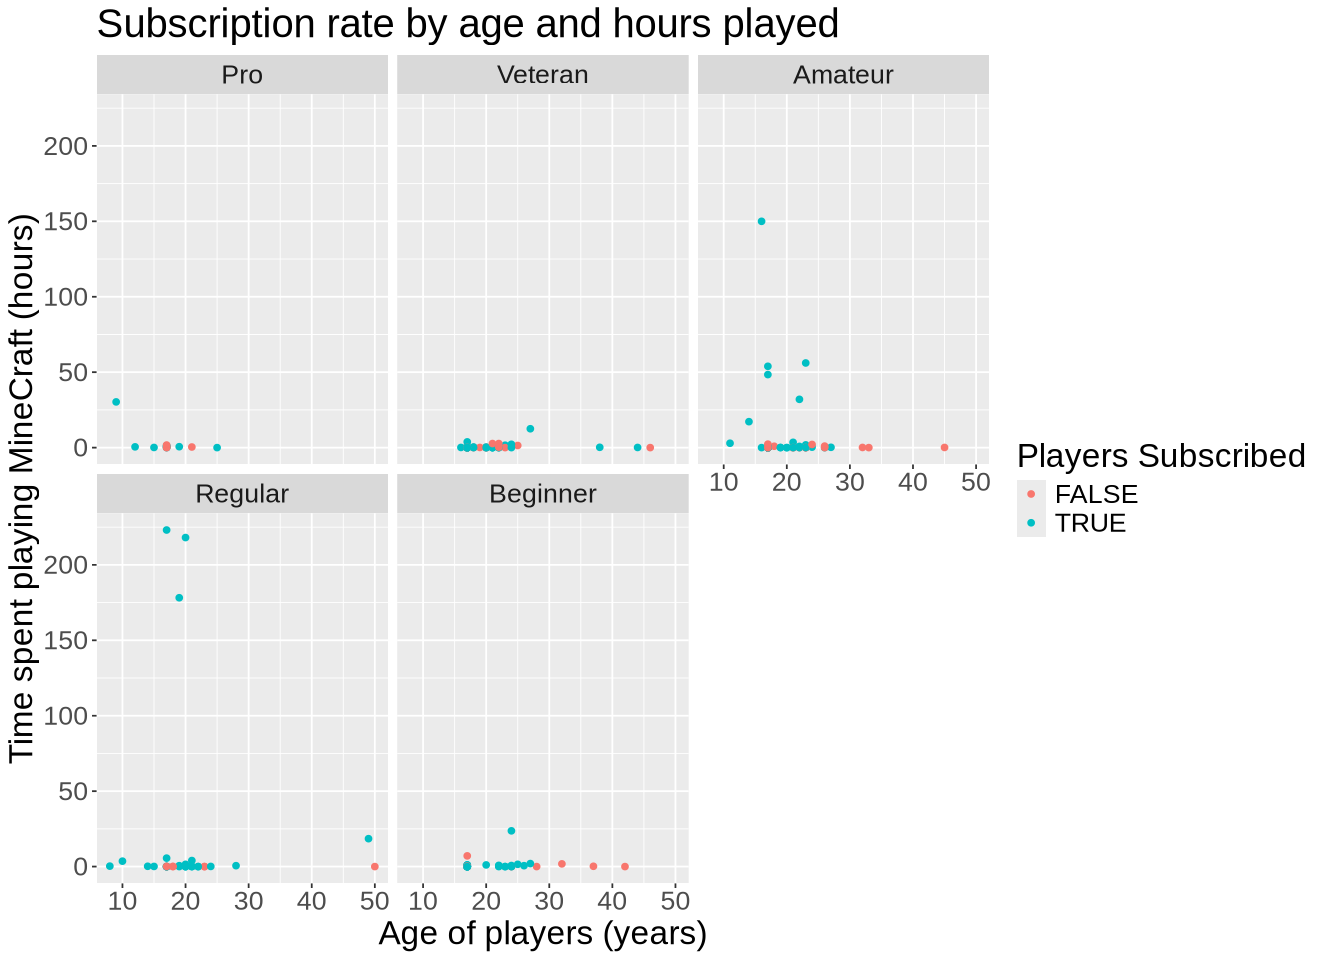

In [5]:
options(repr.plot.height = 8, repr.plot.width = 11)

players_plot <- players_clean |>
ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
geom_point()+
facet_wrap(vars(experience))+
labs(x = "Age of players (years)", y = "Time spent playing MineCraft (hours)", color = "Players Subscribed")+
ggtitle("Subscription rate by age and hours played")+
theme (text =element_text (size = 20))

players_plot

In [17]:
set.seed(2025)
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(subscribe ~ Age + played_hours + experience, data = players_train) |>
step_scale(all_numeric_predictors()) |>
step_center(all_numeric_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification") 

players_folds <- vfold_cv(players_train, v = 5, strata = subscribe)

k_vals = tibble(neighbors = seq(from = 1, to = 20, by = 2)) 

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec)|>
tune_grid(resamples = players_folds, grid = k_vals) |>
collect_metrics()

accuracies <- knn_fit |>
filter(.metric == "accuracy")

accuracies


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6064696,5,0.033007197,Preprocessor1_Model01
3,accuracy,binary,0.6688342,5,0.033866668,Preprocessor1_Model02
5,accuracy,binary,0.6543021,5,0.030914177,Preprocessor1_Model03
7,accuracy,binary,0.6823810,5,0.014394758,Preprocessor1_Model04
9,accuracy,binary,0.6895074,5,0.003389363,Preprocessor1_Model05
11,accuracy,binary,0.6966502,5,0.011931356,Preprocessor1_Model06
13,accuracy,binary,0.7030706,5,0.018809658,Preprocessor1_Model07
15,accuracy,binary,0.7240066,5,0.011312950,Preprocessor1_Model08
17,accuracy,binary,0.7242529,5,0.009854939,Preprocessor1_Model09


In [18]:
best_k <-  accuracies |>
arrange(desc(mean)) |>
head(1) |>
pull(neighbors)
best_k


[1] 19

In [19]:
knn_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) |>
set_engine("kknn") |>
set_mode("classification") 

final_fit <- workflow() |>
add_recipe(players_recipe) |>
add_model(knn_final_spec) |>
fit(data = players_train)

final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(15,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3034483
Best kernel: rectangular
Best k: 15

In [20]:
players_test_predictions <- predict(final_fit, players_test)|> 
bind_cols(players_test)
metrics_results <- players_test_predictions |>
metrics(truth = subscribe, estimate = .pred_class) |>
filter(.metric == "accuracy") |>
select(.estimate) |>
pull()

metrics_results


[1] 0.7346939

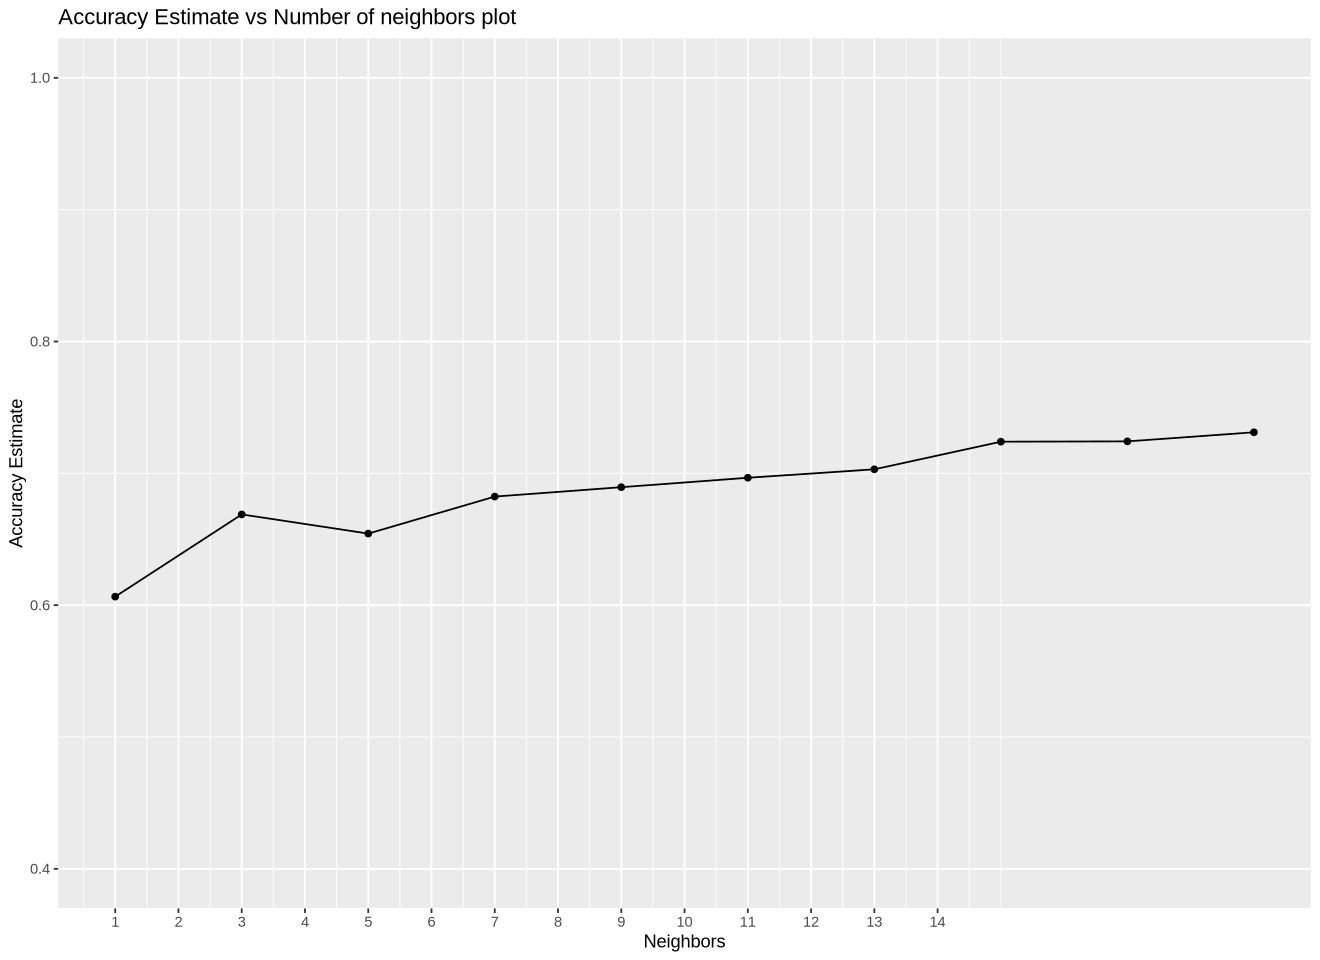

In [22]:

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracy Estimate vs Number of neighbors plot") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) 

accuracy_versus_k